In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
font = {'size': 12}
plt.rc ('font', **font)

In [26]:
titanic = pd.read_csv("C:/Users/luciana H/Desktop/YulietMira/UNIVERSIDAD/SEMESTRE 5/ANALISIS DE DATOS/Etapa 3/train.csv" ,delimiter=',')
titanic_2 = pd.read_csv("C:/Users/luciana H/Desktop/YulietMira/UNIVERSIDAD/SEMESTRE 5/ANALISIS DE DATOS/Etapa 3/test.csv" ,delimiter=',')

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [30]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


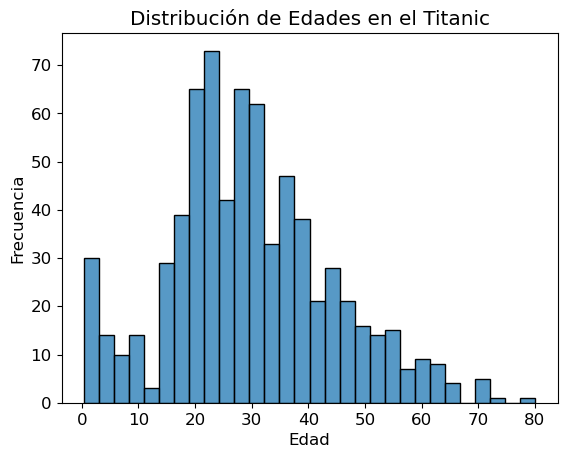

In [31]:
sns.histplot(titanic['Age'].dropna(), kde=False, bins=30)
plt.title('Distribución de Edades en el Titanic')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

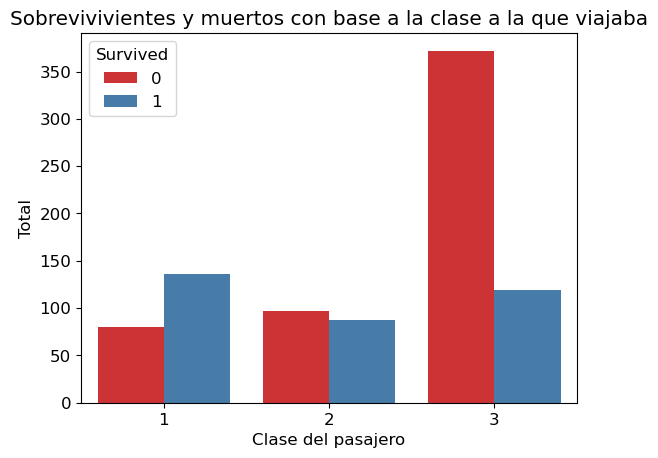

In [32]:
titanic.groupby(['Pclass', 'Survived'])['Survived'].count()
ax = sns.countplot(x='Pclass', hue='Survived', palette='Set1', data=titanic)
ax.set (title='Sobrevivivientes y muertos con base a la clase a la que viajaba',
        xlabel='Clase del pasajero', ylabel= 'Total')
plt.show()

In [33]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [34]:
promedio_edad = titanic['Age'].mean()

In [35]:
print(f"La media de la edad en el conjunto de datos del Titanic es: {promedio_edad:.2f} años")

La media de la edad en el conjunto de datos del Titanic es: 29.36 años


In [36]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

In [37]:
h_m = titanic['Sex'].value_counts()

In [38]:
print("Cantidad de Hombres y Mujeres en el conjunto de datos del Titanic:")
print(h_m)

Cantidad de Hombres y Mujeres en el conjunto de datos del Titanic:
0    577
1    314
Name: Sex, dtype: int64


In [39]:
sobrevivientes = titanic['Survived'].value_counts()

In [40]:
print("Cantidad de Sobrevivientes en el conjunto de datos del Titanic:")
print(sobrevivientes)

Cantidad de Sobrevivientes en el conjunto de datos del Titanic:
0    549
1    342
Name: Survived, dtype: int64


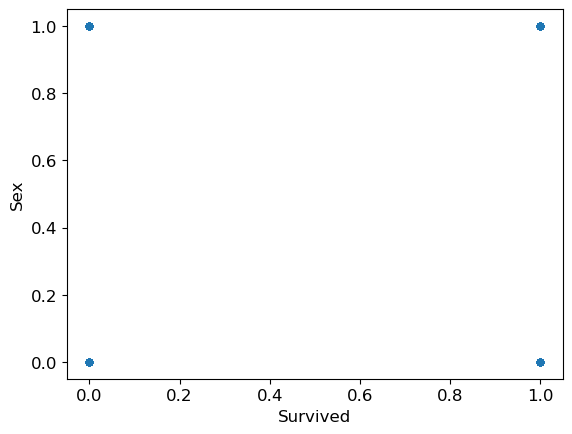

In [41]:
titanic.plot.scatter(x="Survived", y="Sex")
plt.show()

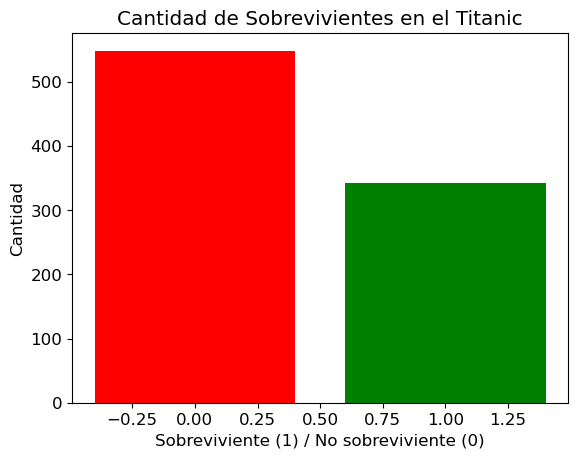

In [42]:
plt.bar(sobrevivientes.index, sobrevivientes.values, color=['red', 'green'])
plt.title('Cantidad de Sobrevivientes en el Titanic')
plt.xlabel('Sobreviviente (1) / No sobreviviente (0)')
plt.ylabel('Cantidad')
plt.show()

In [43]:
ninos_hasta = 18
titanic['Categoria'] = 'Hombre'
titanic.loc[titanic['Sex'] == 1, 'Categoria'] = 'Mujer'
titanic.loc[titanic['Age'] < ninos_hasta, 'Categoria'] = 'Niño'

In [44]:
no_sobrevivientes = titanic[titanic['Survived'] == 0]

In [45]:
muertes = no_sobrevivientes['Categoria'].value_counts()

In [46]:
sobrevivientes = titanic['Survived'].value_counts()

In [51]:
print("Cantidad de personas sobrevivientes y no sobrevivientes:")
print(sobrevivientes)

Cantidad de personas sobrevivientes y no sobrevivientes:
0    549
1    342
Name: Survived, dtype: int64


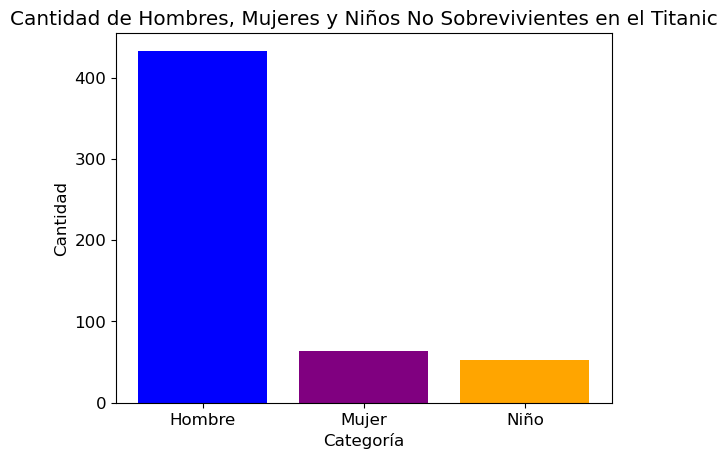

In [48]:
plt.bar(muertes.index, muertes.values, color=['blue', 'purple', 'orange'])
plt.title('Cantidad de Hombres, Mujeres y Niños No Sobrevivientes en el Titanic')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()

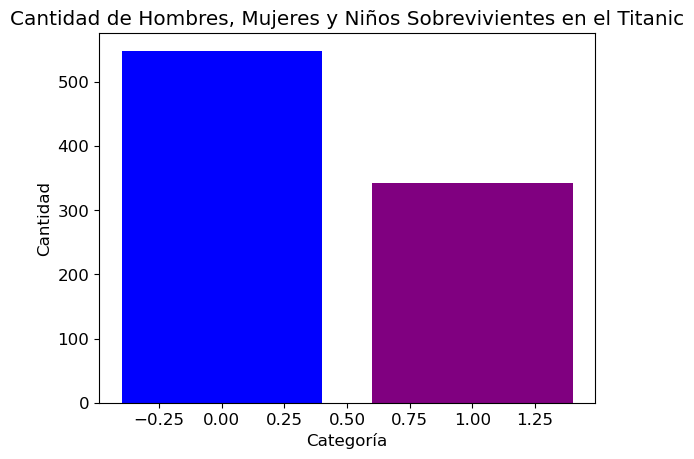

In [50]:
plt.bar(sobrevivientes.index, sobrevivientes.values, color=['blue', 'purple', 'orange'])
plt.title('Cantidad de Hombres, Mujeres y Niños Sobrevivientes en el Titanic')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()